# EDA and Feature Engineering

First lets do some EDA on the training data, to determine the distribution of each variable. This could assist in visualising the difference between 1 and 0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import dataset - train
training_data = pd.read_csv('../data/raw/train (1).csv')

In [4]:
# inspect the data
training_data.head()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 22 columns):
Id_old         8000 non-null int64
Id             8000 non-null int64
GP             8000 non-null int64
MIN            8000 non-null float64
PTS            8000 non-null float64
FGM            8000 non-null float64
FGA            8000 non-null float64
FG%            8000 non-null float64
3P Made        8000 non-null float64
3PA            8000 non-null float64
3P%            8000 non-null float64
FTM            8000 non-null float64
FTA            8000 non-null float64
FT%            8000 non-null float64
OREB           8000 non-null float64
DREB           8000 non-null float64
REB            8000 non-null float64
AST            8000 non-null float64
STL            8000 non-null float64
BLK            8000 non-null float64
TOV            8000 non-null float64
TARGET_5Yrs    8000 non-null int64
dtypes: float64(18), int64(4)
memory usage: 1.3 MB


In [6]:
training_data.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,7798.50000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,3977.447579,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [7]:
training_data.shape

(8000, 22)

In [8]:
# how many distinct id's are there?
len(training_data.Id.unique())

8000

In [9]:
# check distribution of the target
training_data.TARGET_5Yrs.value_counts()

1    6669
0    1331
Name: TARGET_5Yrs, dtype: int64

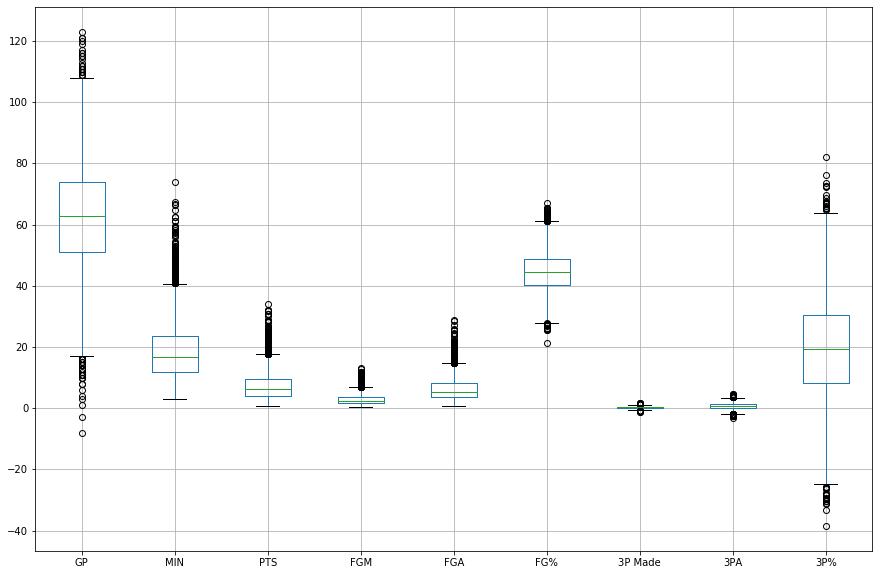

In [10]:
# plot the distribution of the first 5 variables
boxplot = training_data.boxplot(column=['GP', 'MIN', 'PTS','FGM','FGA','FG%','3P Made','3PA', '3P%'], figsize = (15,10))

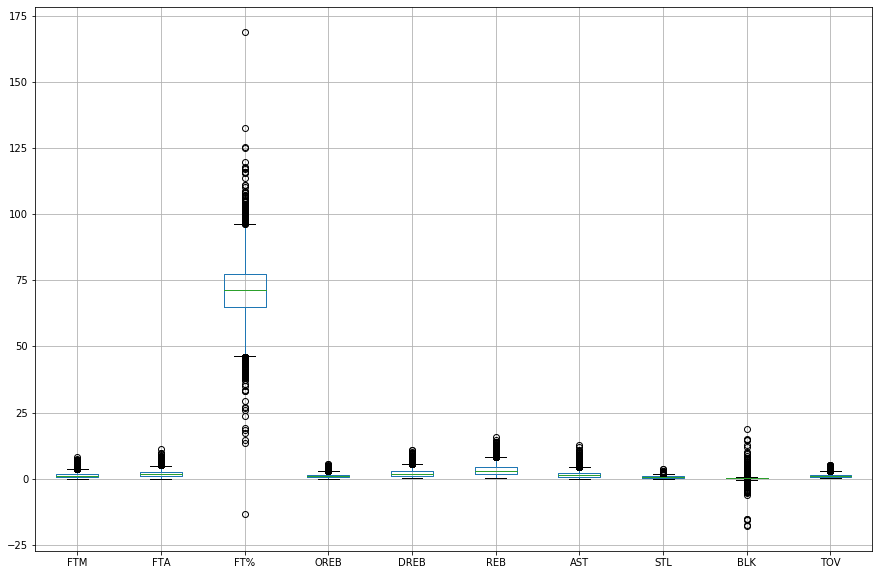

In [11]:
boxplot2 = training_data.boxplot(column=['FTM','FTA','FT%','OREB','DREB','REB','AST','STL','BLK','TOV'], figsize = (15,10))

In [12]:
df_train = training_data.copy()

In [16]:
df_one = df_train[df_train['TARGET_5Yrs'] == 1]
print(df_one.shape)

(6669, 22)


In [17]:
df_one.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,...,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.0
mean,6889.367971,7805.355676,64.629330,19.303929,7.618219,2.945899,6.491243,45.045719,0.267102,0.818204,...,2.046544,71.549543,1.138417,2.273024,3.408892,1.683131,0.672065,0.281392,1.306628,1.0
std,3971.261531,2314.677310,16.718539,9.069595,4.396696,1.726871,3.655725,6.093200,0.384559,1.062603,...,1.271339,10.469601,0.802867,1.419288,2.125565,1.386373,0.415717,0.766430,0.735796,0.0
min,4.000000,3799.000000,-3.000000,3.300000,0.900000,0.300000,0.900000,21.300000,-1.100000,-2.600000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-15.700000,0.100000,1.0
25%,3472.000000,5801.000000,53.000000,12.600000,4.400000,1.700000,3.800000,40.900000,0.000000,0.100000,...,1.100000,65.300000,0.500000,1.200000,1.800000,0.700000,0.400000,0.100000,0.800000,1.0
50%,6793.000000,7811.000000,64.000000,17.600000,6.700000,2.600000,5.700000,44.900000,0.300000,0.800000,...,1.800000,71.500000,1.000000,2.000000,3.000000,1.300000,0.600000,0.200000,1.200000,1.0
75%,10326.000000,9824.000000,76.000000,24.500000,9.900000,3.900000,8.400000,49.000000,0.500000,1.500000,...,2.700000,77.600000,1.500000,3.000000,4.500000,2.300000,0.900000,0.400000,1.700000,1.0
max,13798.000000,11798.000000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.0


In [18]:
# same for the 0 class
df_zero = df_train[df_train['TARGET_5Yrs'] == 0]
print(df_zero.shape)

(1331, 22)


In [19]:
df_zero.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,...,1331.000000,1331.000000,1331.000000,1331.000000,1331.00000,1331.000000,1331.000000,1331.000000,1331.000000,1331.0
mean,6694.645379,7764.149512,53.501127,14.932682,5.507739,2.111270,4.928325,42.420210,0.251615,0.808340,...,1.452968,70.445304,0.774305,1.644778,2.42562,1.330804,0.531555,0.063937,1.012923,0.0
std,4005.854809,2284.210496,16.057995,7.199469,3.397495,1.309242,2.870119,5.999187,0.381631,1.053072,...,1.017544,10.186075,0.608425,1.108596,1.64057,1.148362,0.341199,1.034295,0.599936,0.0
min,7.000000,3811.000000,-8.000000,2.900000,0.800000,0.300000,0.800000,25.600000,-1.100000,-3.100000,...,0.000000,23.700000,0.000000,0.200000,0.30000,0.000000,0.000000,-17.900000,0.100000,0.0
25%,3182.500000,5787.000000,43.000000,9.700000,2.950000,1.100000,2.800000,38.250000,0.000000,0.100000,...,0.700000,63.700000,0.300000,0.900000,1.20000,0.500000,0.300000,0.000000,0.600000,0.0
50%,6765.000000,7704.000000,53.000000,13.500000,4.700000,1.800000,4.200000,42.100000,0.200000,0.800000,...,1.200000,70.600000,0.600000,1.400000,2.00000,1.000000,0.500000,0.200000,0.900000,0.0
75%,10135.500000,9695.000000,64.000000,18.800000,7.100000,2.700000,6.300000,46.500000,0.500000,1.500000,...,1.900000,76.600000,1.100000,2.100000,3.10000,1.900000,0.700000,0.300000,1.300000,0.0
max,13788.000000,11793.000000,107.000000,51.400000,25.000000,9.800000,21.000000,65.300000,1.600000,4.600000,...,6.500000,124.900000,3.500000,8.500000,11.80000,8.900000,2.300000,9.600000,3.400000,0.0


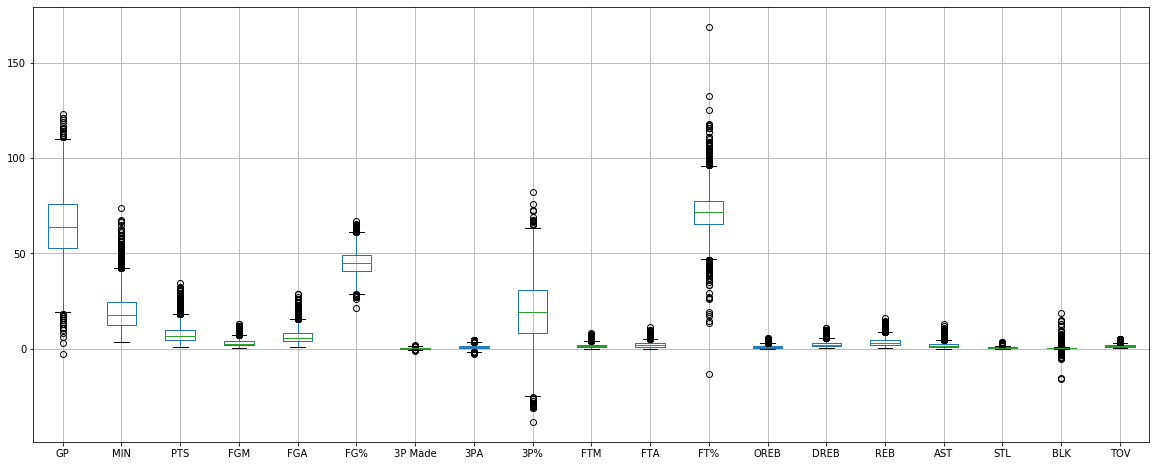

In [22]:
# plot the distribution of class 1 variables
boxplot_one = df_one.boxplot(column=['GP', 'MIN', 'PTS','FGM','FGA','FG%','3P Made','3PA', '3P%','FTM','FTA','FT%','OREB','DREB','REB','AST','STL','BLK','TOV'], figsize = (20,8))

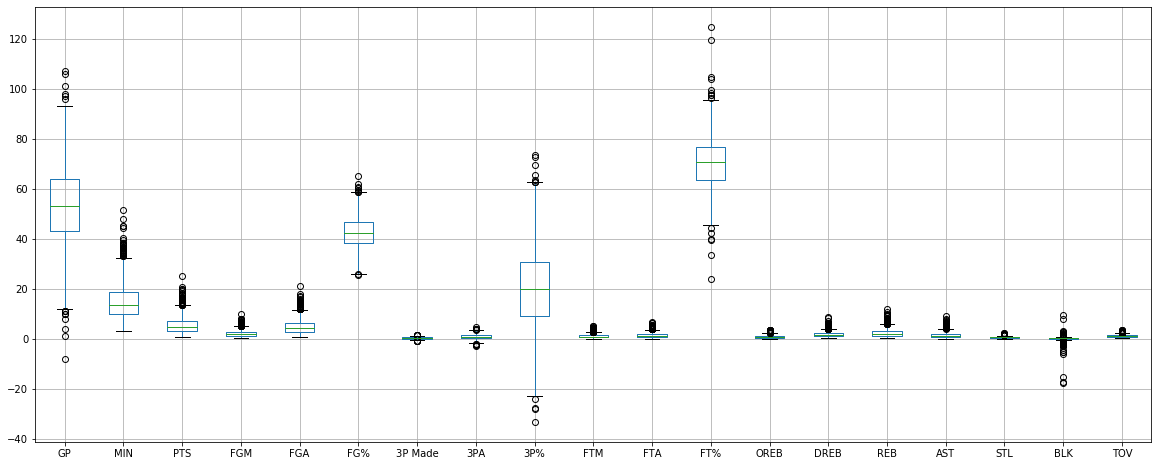

In [23]:
# plot the distribution of class 0 variables
boxplot_zero = df_zero.boxplot(column=['GP', 'MIN', 'PTS','FGM','FGA','FG%','3P Made','3PA', '3P%','FTM','FTA','FT%','OREB','DREB','REB','AST','STL','BLK','TOV'], figsize = (20,8))

In [25]:
neg_3p_perc = df_train[df_train['3P%'] <0 ]
print(neg_3p_perc)

      Id_old     Id  GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  ...  FTA  \
6       2677   3805  70  20.6   7.0  3.2   5.4  58.9      0.1 -0.1  ...  1.4   
9       3040   3808  64  33.4  16.9  6.4  11.3  59.0      0.3  1.1  ...  4.9   
12     13144   3811  41   9.8   2.3  0.9   2.3  37.9     -0.4 -0.6  ...  1.3   
19       829   3818  64  10.4   5.1  2.2   4.9  45.5     -0.1 -0.2  ...  1.8   
31      6039   3830  35  14.7   4.5  1.9   3.5  52.2     -0.2 -0.5  ...  1.5   
...      ...    ...  ..   ...   ...  ...   ...   ...      ...  ...  ...  ...   
7973    7825  11772  46   9.9   3.8  1.4   2.7  51.7     -0.8 -2.3  ...  1.4   
7983   11271  11782  75  17.5   7.8  2.9   5.9  49.0     -0.2 -0.6  ...  3.5   
7984     806  11783  59  21.0   8.1  2.9   5.3  55.9      0.0  0.1  ...  2.6   
7990   13494  11789  63  10.6   4.8  1.8   3.2  54.6     -0.3 -0.8  ...  1.7   
7991    7895  11790  60  18.3   8.9  3.8   7.5  48.4     -0.2 -0.5  ...  2.3   

       FT%  OREB  DREB   REB  AST  STL 

In [31]:
neg_3p_perc[['3P Made','3PA','3P%']].head(50)

,3P Made,3PA,3P%
6,0.1,-0.1,-3.6
9,0.3,1.1,-13.0
12,-0.4,-0.6,-4.7
19,-0.1,-0.2,-6.1
31,-0.2,-0.5,-30.2
38,0.4,1.1,-11.4
39,0.0,-0.1,-0.3
43,-0.3,-0.6,-4.3
48,0.1,0.5,-3.4
50,-0.7,-1.6,-5.2


The percentage columns are not calculations of other columns, or have already been normalised over the length of the players careers or something like that.

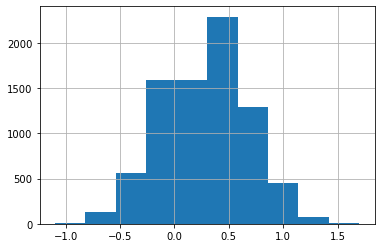

In [33]:
df_train['3P Made'].hist()

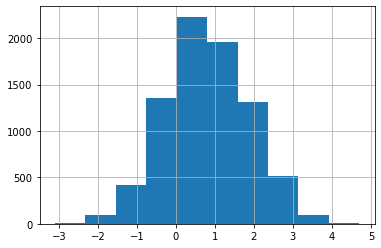

In [34]:
df_train['3PA'].hist()

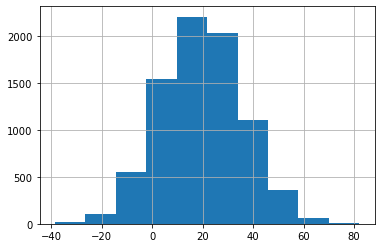

In [35]:
df_train['3P%'].hist()

# interpretation

The distribution of each class is very similar, the average stats for class 1 are slightly higher, but the std is almost the same as the 0 class.

Model will have difficulty differentiating between the two, since the values are so similar.

There needs to be a way of better differentiating between the two classes. 